In [1]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [10]:
from tqdm import tqdm

In [11]:
im_dict = {
    'img_path': [],
    'img_embed': []
}

In [12]:
import glob
import os

batch_size = 8

device = "cuda" if torch.cuda.is_available() else "cpu"

image_paths = glob.glob(os.path.join("test_task_data/test_task_data", "*.jpg"))
total_batches = (len(image_paths) + batch_size - 1) // batch_size

for i in tqdm(range(0, len(image_paths), batch_size), total=total_batches, desc="Processing Batches"):
    batch = image_paths[i:i+batch_size]
    images = [preprocess(Image.open(impath)).unsqueeze(0).to(device) for impath in batch]
    images = torch.cat(images, dim=0)
    
    with torch.no_grad():
        image_features = model.encode_image(images)
        im_dict['img_path'].extend(batch)
        im_dict['img_embed'].extend(image_features.cpu().tolist())
        print(image_features.cpu().tolist())
        break

Processing Batches:   0%|          | 0/1000 [00:00<?, ?it/s]

Processing Batches:   0%|          | 0/1000 [00:00<?, ?it/s]

[[0.66650390625, 0.296630859375, -0.0999755859375, -0.27880859375, -0.1583251953125, -0.060211181640625, 0.1639404296875, -0.07403564453125, 0.285888671875, 0.2259521484375, 0.019439697265625, 0.10601806640625, 0.0310516357421875, -0.406982421875, -0.29833984375, -0.59619140625, 0.87109375, 0.1527099609375, -0.6015625, 0.15625, 0.25732421875, 0.5732421875, 0.448974609375, -0.04437255859375, -0.479248046875, -0.486572265625, 0.1357421875, -0.30078125, -0.374755859375, -0.315673828125, 0.376953125, -0.0128173828125, -0.0721435546875, -0.2249755859375, -0.0953369140625, 0.2998046875, -0.498046875, -0.1041259765625, 0.1861572265625, 1.6162109375, 0.161376953125, -0.453125, -0.256591796875, -0.0187835693359375, -0.2392578125, 1.693359375, 0.10009765625, 0.433837890625, 0.400634765625, -0.169921875, 0.09375, 0.3681640625, -0.22216796875, -0.440185546875, -0.431640625, -0.2841796875, 0.207763671875, 0.115966796875, -0.14697265625, 0.30908203125, 0.90673828125, 0.01502227783203125, 0.472167968

In [5]:
import pandas as pd

df = pd.DataFrame(im_dict)

In [6]:
df

,img_path,img_embed
0,test_task_data/test_task_data\946af92863c6267e...,"[0.66650390625, 0.296630859375, -0.09997558593..."
1,test_task_data/test_task_data\cc48873643b54f73...,"[0.166259765625, 0.212158203125, -0.1755371093..."
2,test_task_data/test_task_data\e288c3ae6d469e1e...,"[-0.0304107666015625, 0.1925048828125, -0.1983..."
3,test_task_data/test_task_data\fdc442bb1d04f8ca...,"[0.69482421875, -0.272705078125, -0.4379882812..."
4,test_task_data/test_task_data\ef92f0a2e2941a9e...,"[-0.470703125, -0.1654052734375, 0.27294921875..."
...,...,...
7995,test_task_data/test_task_data\9c9229c5f63c4a97...,"[0.10162353515625, -0.05810546875, 0.194091796..."
7996,test_task_data/test_task_data\fb008c9796ee7261...,"[-0.199951171875, -0.489013671875, -0.22424316..."
7997,test_task_data/test_task_data\813926cc76db9933...,"[0.293212890625, 0.08782958984375, -0.20410156..."
7998,test_task_data/test_task_data\94f7cbe895189427...,"[-0.31787109375, -0.127197265625, -0.056304931..."


In [7]:
df.to_csv('embeddings/embeds.csv')

In [3]:
from matplotlib import pyplot as plt

In [4]:
import pandas as pd

df = pd.read_csv('embeddings/embeds.csv')

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
import numpy as np
df["img_embed"] = df["img_embed"].apply(eval)
database_embeddings = np.vstack(df["img_embed"].values)

In [18]:
database_embeddings[0]

array([ 6.66503906e-01,  2.96630859e-01, -9.99755859e-02, -2.78808594e-01,
       -1.58325195e-01, -6.02111816e-02,  1.63940430e-01, -7.40356445e-02,
        2.85888672e-01,  2.25952148e-01,  1.94396973e-02,  1.06018066e-01,
        3.10516357e-02, -4.06982422e-01, -2.98339844e-01, -5.96191406e-01,
        8.71093750e-01,  1.52709961e-01, -6.01562500e-01,  1.56250000e-01,
        2.57324219e-01,  5.73242188e-01,  4.48974609e-01, -4.43725586e-02,
       -4.79248047e-01, -4.86572266e-01,  1.35742188e-01, -3.00781250e-01,
       -3.74755859e-01, -3.15673828e-01,  3.76953125e-01, -1.28173828e-02,
       -7.21435547e-02, -2.24975586e-01, -9.53369141e-02,  2.99804688e-01,
       -4.98046875e-01, -1.04125977e-01,  1.86157227e-01,  1.61621094e+00,
        1.61376953e-01, -4.53125000e-01, -2.56591797e-01, -1.87835693e-02,
       -2.39257812e-01,  1.69335938e+00,  1.00097656e-01,  4.33837891e-01,
        4.00634766e-01, -1.69921875e-01,  9.37500000e-02,  3.68164062e-01,
       -2.22167969e-01, -

In [19]:
def find_similar_images(image_path, top_k=5):
    """Find top_k most similar images to the input image."""
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    
    with torch.no_grad():
        query_embedding = model.encode_image(image).cpu().numpy()
    
    similarities = cosine_similarity(query_embedding, database_embeddings)[0]
    top_indices = np.argsort(similarities)[-top_k:][::-1]  # Get top K indices
    return df.iloc[top_indices], similarities[top_indices]


def display_results(image_path, similar_images, scores):
    """Display input image along with retrieved similar images."""
    fig, axes = plt.subplots(1, len(similar_images) + 1, figsize=(15, 5))
    
    # Show input image
    axes[0].imshow(Image.open(image_path))
    axes[0].set_title("Query Image")
    axes[0].axis("off")
    
    # Show similar images
    for i, (img_path, score) in enumerate(zip(similar_images["img_path"], scores)):
        axes[i + 1].imshow(Image.open(img_path))
        axes[i + 1].set_title(f"{score:.2f}")
        axes[i + 1].axis("off")
    
    plt.show()

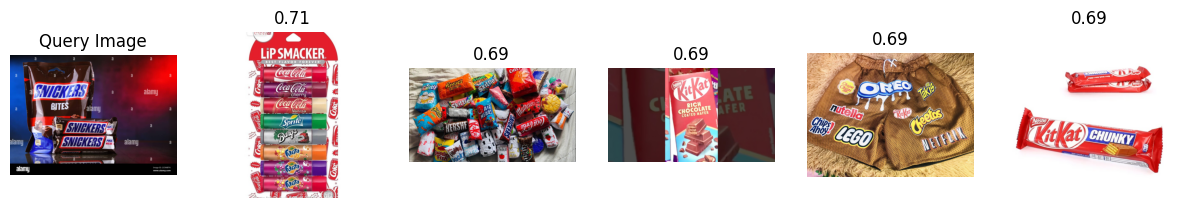

In [20]:
input_image = "test_images/img_1.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)

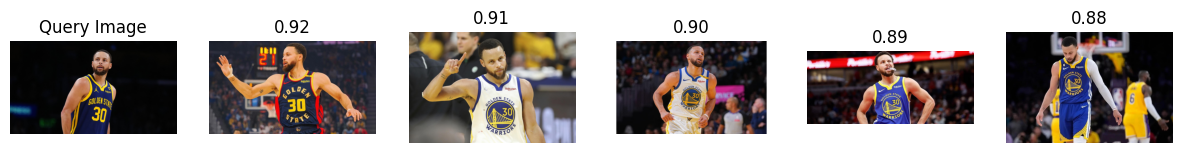

In [21]:
input_image = "test_images/img_2.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)

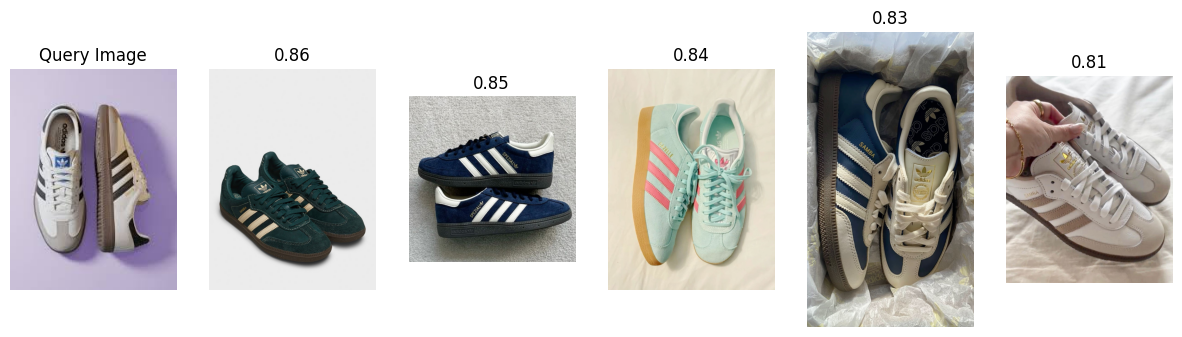

In [22]:
input_image = "test_images/img_3.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)

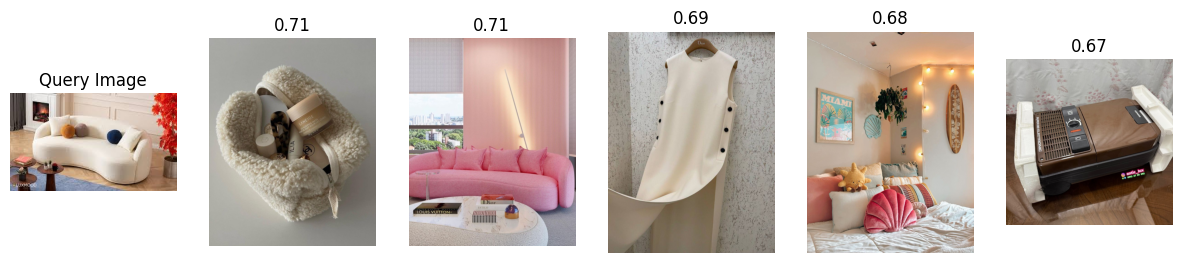

In [23]:
input_image = "test_images/img_4.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)

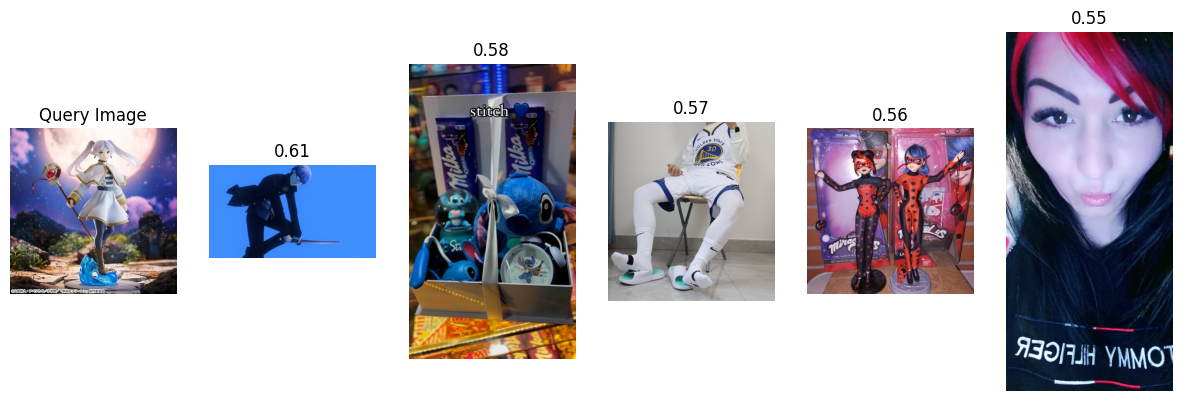

In [24]:
input_image = "test_images/img_5.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)

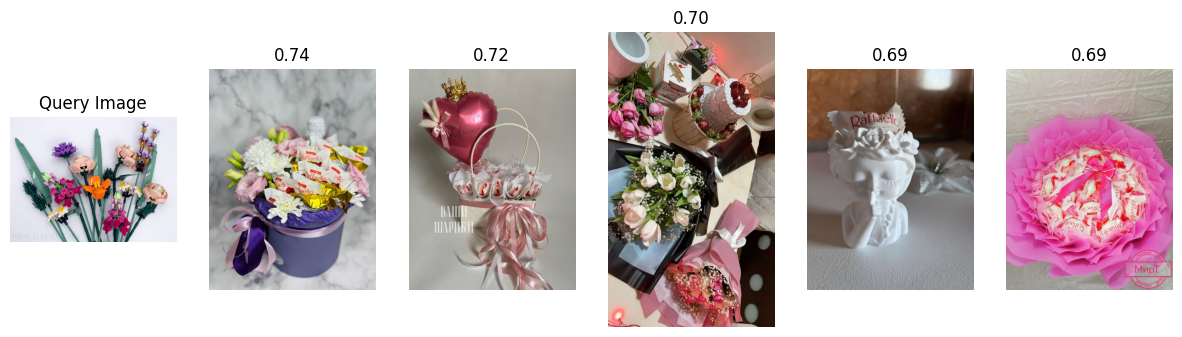

In [25]:
input_image = "test_images/img_6.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)

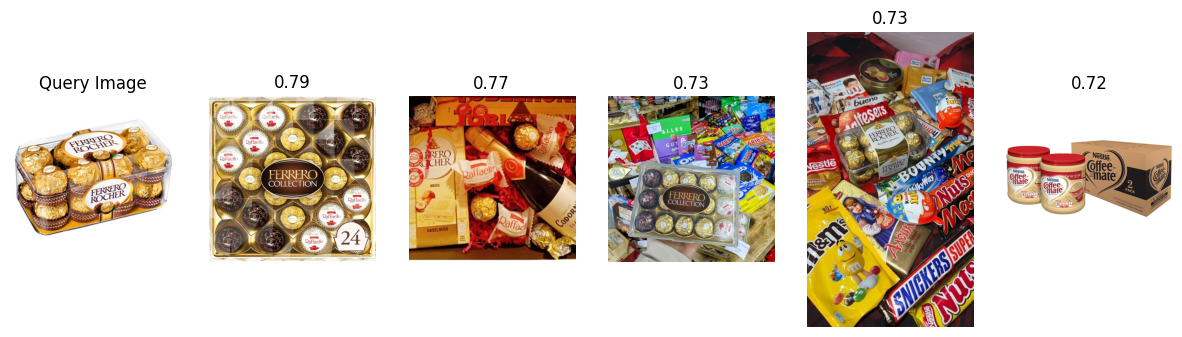

In [26]:
input_image = "test_images/img_7.jpg"
similar_images, scores = find_similar_images(input_image)
display_results(input_image, similar_images, scores)